# PAA KWESI BLANKSON, DATA ANALYST

### Welcome to My Airbnb Mini Practice Project
      
<b> I am currently interested in the Airbnb business within New York City specifically Manhattan, Queens and Brooklyn. So I want to use the NYC Airbnb dataset to identify which areas are the most viable business options.</b> 

<H3>  Let's get started! </H3>

### Step 1: <span style="color:green">Import Libraries</span> 

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

In [61]:
df = pd.read_csv(r"A:\PROJECTS\PYTHON_ARENA\Brief_NYC_AirBnB_EDA\Airbnb_Brief_EDA.csv")

In [62]:
#I want to get a concise summary of the dataframe so I use .info() function.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Step 3: <span style="color:green">Exploring the data with Pandas</span> 

I want to focus on the following using my Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> Firstly, I want to count how many airbnb listings are in each of the 5 Neighbourhood Groups in NYC where I reside =and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>

In [63]:
# Here, I use the .value_counts() function which returns the count of occurance of each value 
# in the dataframe or in a particular column

df["neighbourhood_group"].value_counts() 

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

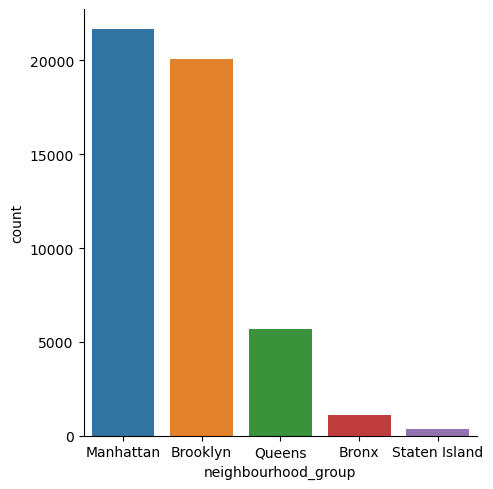

In [64]:
#I want to view the above in a bar graph, so here I use seaborn

sns.catplot(x = "neighbourhood_group",
           data = df,
           kind= "count",
           order=["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"])
plt.show()

From the above, we can observe that Manhattan has the highest listing with 21,661 listings, followed by Brooklyn with 20,104. 


<b>Next,  I want us to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings, therefore I would calculate the percentage listings that each Neighbourhood Group contains. </b>


In [65]:
#(df["neighbourhood_group"].value_counts()) / (df.neighbourhood_group.count()) *100
df['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

### Creating a new calculated field for revenue 

<b> Here I would create a new calculated field called Revenue and place this into the Airbnb Dataframe. I would do this by using the Price Column x Number_Of_Reviews Columns </b>

In [66]:
df["Revenue"] = (df["price"]) * (df["number_of_reviews"])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365,1341
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355,10125
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/07/2019,4.64,1,194,24030
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0,720


<b> Now i want know which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax </b>

In [67]:
(df
.groupby("neighbourhood_group")["Revenue"]
.mean()
.sort_values(ascending=False))

neighbourhood_group
Manhattan        3375.960574
Brooklyn         2927.567400
Staten Island    2541.764075
Queens           2400.151077
Bronx            1999.439963
Name: Revenue, dtype: float64

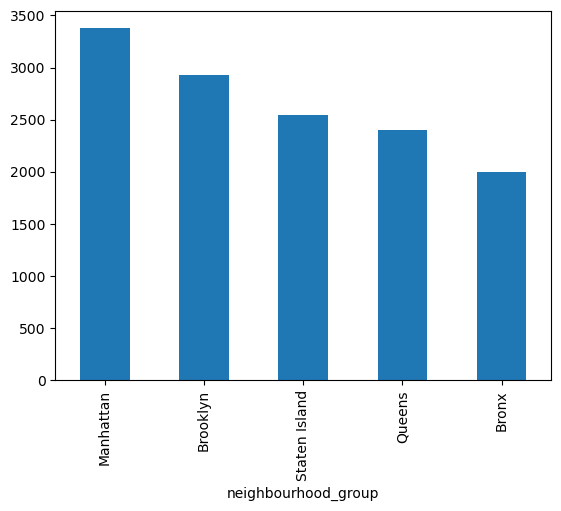

In [68]:
(
df
.groupby("neighbourhood_group")["Revenue"]
.mean()
.sort_values(ascending=False)
.plot(kind="bar")
)
plt.show()

<b>Neighbourhoods in Manhanttan recorded the highest average revenue of US$3,375   </b>

<h3> <span style="color:green">Slicing Neigbourhood Groups to include Neibourhood Groups in Manhattan, Brooklyn and Queens while focusing on 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups</span> </h3>

In [69]:
##Filter the Airbnb Dataframe to include only the Neighbourhood Groups Manhattan, Brookly and Queens

mbq = (
df[df["neighbourhood_group"]
.isin(["Manhattan", "Brooklyn", "Queens"])]
)

top_n=mbq.groupby(["neighbourhood_group", "neighbourhood"])["Revenue"].sum().sort_values(ascending=False).reset_index().groupby('neighbourhood_group').head(3)
top_n

,neighbourhood_group,neighbourhood,Revenue
0,Brooklyn,Williamsburg,12389011
1,Brooklyn,Bedford-Stuyvesant,12352457
2,Manhattan,Harlem,8598692
3,Manhattan,Hell's Kitchen,8238991
4,Manhattan,East Village,7574535
8,Brooklyn,Bushwick,4762224
17,Queens,Astoria,1880840
28,Queens,Long Island City,1374945
33,Queens,Flushing,1140450


# Drlling Down deeper on actual neighbourhood

<b>Building on the above I would filter the Airbnb Dataframe to include only the 9 neighbourhoods and I would identify the  top average revenue generating room type for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

<b>Bedford-Stuyvesant neighborhood in Brooklyn has the highest average revenue for the period with nearly US$6,0000</b>

In [ ]:
#Step One.Subset dataframe to the top 9 neighbourhoods
#Step Two. GROUP BY to get the overall average (i.e. mean()) for each neighbourhood and room type combination
#Step Three. Sort this in descending order so that the top room types for each neighbourhood combination is at the top
#Step Four. Next, reset the Index so the pandas series, becomes a dataframe again.
#Step Five. Use the .drop_duplicates() to remove the additional entries for each neighbourhood and room_type


#top = top_n.groupby(["neighbourhood_group", "neighbourhood", "room_type"])["Revenue"].sum().sort_values(ascending=False).reset_index()
#top_Man = top[top["neighbourhood_group"] == "Manhattan"].head(3)
#top_Bro = top[top["neighbourhood_group"] == "Brooklyn"].head(3)
#top_Que = top[top["neighbourhood_group"] == "Queens"].head(3)
#top_mbq = pd.concat([top_Man, top_Bro, top_Que], axis=0)
#top_mbq

In [102]:
ta = (
    pd.DataFrame((df[df["neighbourhood"].isin(top_n["neighbourhood"])].groupby(["neighbourhood_group","neighbourhood", "room_type"])["Revenue"]
                  .mean()).sort_values(ascending=False)).reset_index()
)

ta = ta.drop_duplicates("neighbourhood")

ta.index = ta.index + 1

ta = ta.rename(columns={"Revenue":"Avg_Revenue"})

ta = ta.drop_duplicates("neighbourhood")

ta


,neighbourhood_group,neighbourhood,room_type,Avg_Revenue
1,Brooklyn,Bedford-Stuyvesant,Entire home/apt,5923.995600
2,Manhattan,Harlem,Entire home/apt,4991.899614
3,Queens,Flushing,Entire home/apt,4879.349057
4,Manhattan,East Village,Entire home/apt,4871.841880
5,Manhattan,Hell's Kitchen,Private room,4713.443452
6,Brooklyn,Williamsburg,Entire home/apt,4659.608673
7,Brooklyn,Bushwick,Entire home/apt,4128.241888
9,Queens,Long Island City,Entire home/apt,3303.504167
10,Queens,Astoria,Entire home/apt,2845.629921


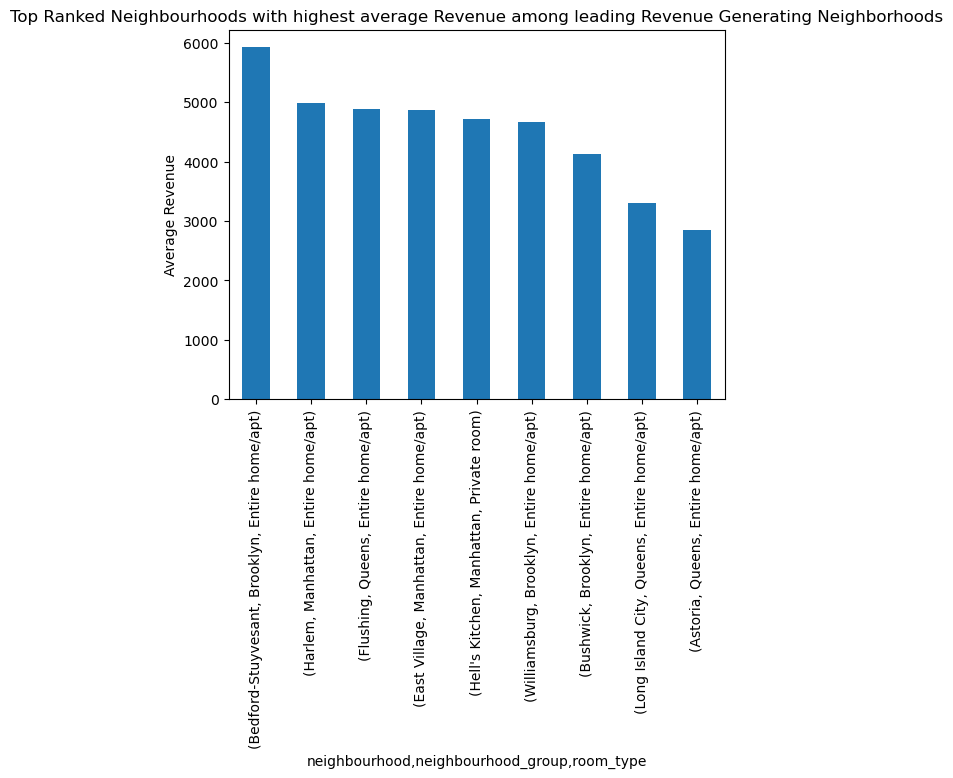

In [103]:
ta.groupby(["neighbourhood", "neighbourhood_group", "room_type"])["Avg_Revenue"].mean().sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Average Revenue")
plt.title("Top Ranked Neighbourhoods with highest average Revenue among leading Revenue Generating Neighborhoods")
plt.show()